### Testing 

In [13]:
import src.processing as sp
import utils.imaging as ui
import settings as st 
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.font_manager as fm

In [14]:
prop = fm.FontProperties(fname='/data/phys-zooniverse/phys2286/pytorch-env39/fonts/open-fonts/Roboto-Light.ttf')

In [5]:
# load the file Mike shared
tags = pd.read_csv(st.data_dir + '/' +'tags.csv')

In [6]:
# find the images fo which we have tags 
df_exists = sp.find_exist_img(tags, save=False)

In [10]:
# keep only the data in a nice format 
df = sp.process_meta(df_exists, save=True, filename = 'tags_images')

In [9]:
df.head()

,tag,user_id,subject_id,image_url,iauname,exists,ra,dec,nsa_id,redshift
0,overlap,247,16215543.0,https://panoptes-uploads.zooniverse.org/produc...,J004301.65-094722.0,1,10.756904,-9.789421,107612.0,0.129951
1,wrong_size,247,16215543.0,https://panoptes-uploads.zooniverse.org/produc...,J004301.65-094722.0,1,10.756904,-9.789421,107612.0,0.129951
2,merger,993,16216219.0,https://panoptes-uploads.zooniverse.org/produc...,J093929.89+164530.8,1,144.874597,16.758533,501758.0,0.049203
3,spiral,993,16216219.0,https://panoptes-uploads.zooniverse.org/produc...,J093929.89+164530.8,1,144.874597,16.758533,501758.0,0.049203
4,star-artifact,135,16216219.0,https://panoptes-uploads.zooniverse.org/produc...,J093929.89+164530.8,1,144.874597,16.758533,501758.0,0.049203


In [11]:
rings = df[df['tag'].isin(['ring'])]

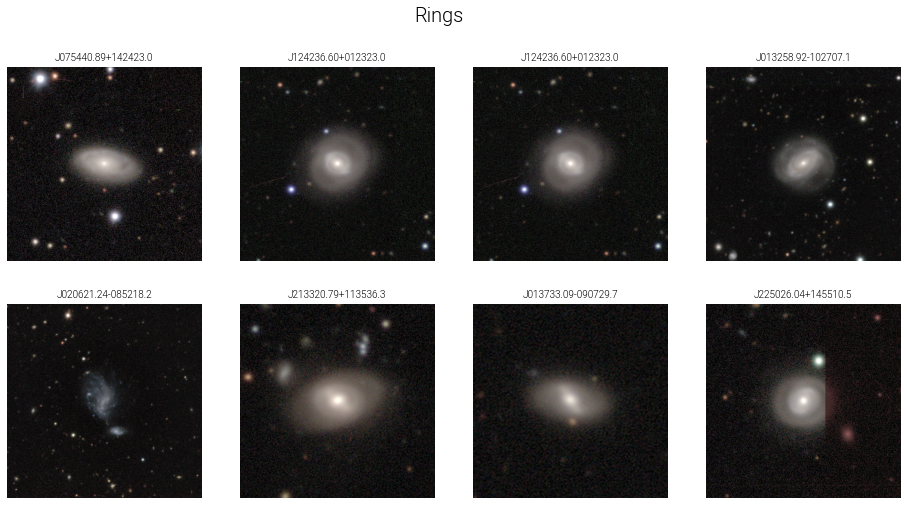

In [16]:
plt.figure(figsize = (16, 8))
plt.suptitle('Rings', fontsize=20, fontproperties=prop)
for i in range(8):
    path, filename = ui.object_name(rings.iauname.iloc[i])
    im_pil, im_arr = ui.load_image(st.decals + '/' + path + '/', filename)
    
    plt.subplot(2, 4, i+1)
    plt.imshow(im_arr)
    plt.title(rings.iauname.iloc[i], fontproperties=prop)
    plt.axis('off')
# plt.savefig('../plots/decals_dr5_rings.pdf', bbox_inches = 'tight')
plt.show()